In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
%matplotlib inline

In [4]:
plt.style.use("ggplot")

In [10]:
df = pd.read_excel("data/data.xlsx")

In [11]:
df.head()

,Unnamed: 0,0
0,0,3.896195
1,1,5.865766
2,2,5.860887
3,3,4.660614
4,4,5.263595


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

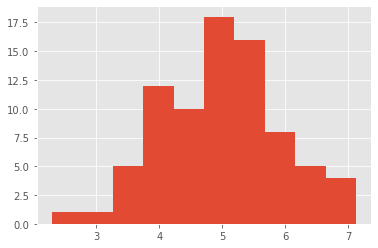

In [12]:
plt.hist(df[0])

In [13]:
stan_model = """
data {
    int N;
    real Y[N];
}

parameters {
    real mu;
    real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i] ~ normal(mu, sigma);
  }
}
"""

In [14]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3dd26de1f88babbd3630572c4b858d35 NOW.
C:\Users\NDA04\Anaconda3\envs\pystan\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\NDA04\AppData\Local\Temp\tmpl119x4xa\stanfit4anon_model_3dd26de1f88babbd3630572c4b858d35_6166300421973814060.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [15]:
stan_data = {"N":df.shape[0], "Y":df[0]}

In [16]:
fit = sm.sampling(data=stan_data,iter=2000,chains = 3,warmup=500,seed=123)

In [17]:
fit

Inference for Stan model: anon_model_3dd26de1f88babbd3630572c4b858d35.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.97  1.8e-3   0.11   4.76    4.9   4.98   5.05   5.18   3520    1.0
sigma   0.97  1.3e-3   0.08   0.83   0.92   0.97   1.02   1.14   3827    1.0
lp__  -37.07    0.02   0.99 -39.79 -37.48 -36.76 -36.36  -36.1   2103    1.0

Samples were drawn using NUTS at Tue May 26 15:40:26 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

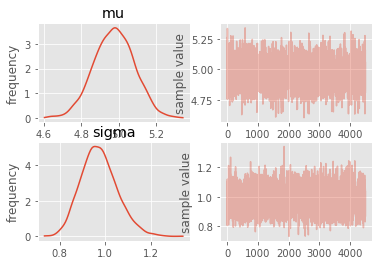

In [20]:
fig = fit.plot()